In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df['cp'].unique()

array([0, 1, 2, 3])

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

 0 = no disease and 1 = disease.

In [4]:
from sklearn.model_selection import train_test_split

X,y = df.drop('target', axis=1), df['target']
#using test size of 40% to make it a bit more difficult
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.4, random_state=9)

In [5]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [6]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf=GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Scale-Sensitive

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
#we dont have to scale the y_train as the knn focuses on the input data only
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
from sklearn.linear_model import LogisticRegression
#even though its called a regression its actually a classification model
log = LogisticRegression()
log.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
forest.score(X_test, y_test) #highest accuracy

0.9853658536585366

In [13]:
nb_clf.score(X_test, y_test)

0.8463414634146341

In [14]:
gb_clf.score(X_test, y_test)

0.9707317073170731

In [15]:
knn.score(X_test_scaled, y_test)

0.8536585365853658

In [16]:
log.score(X_test_scaled, y_test)

0.8731707317073171

In [17]:
svc.score(X_test_scaled, y_test)

0.9341463414634147

In [18]:
#accuracy= if out of 100 guesses 80 of mine are correct= 0.8
#precision=how often when i say they have a disease am i correct about it
#recall= how often when someone has a disease and i predict it

#better to give a false positive than a false negative

In [19]:
from sklearn.metrics import recall_score

y_preds= forest.predict(X_test) #highest recall
print('Forest:', recall_score(y_test, y_preds))

y_preds= nb_clf.predict(X_test)
print('NB:', recall_score(y_test, y_preds))

y_preds= gb_clf.predict(X_test) #highest recall
print('GB:', recall_score(y_test, y_preds))

y_preds= knn.predict(X_test_scaled)
print('KNN:', recall_score(y_test, y_preds))

y_preds= log.predict(X_test_scaled)
print('LOG:', recall_score(y_test, y_preds))

y_preds= svc.predict(X_test_scaled)
print('SVC:', recall_score(y_test, y_preds))

Forest: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9859154929577465
KNN: 0.8732394366197183
LOG: 0.92018779342723
SVC: 0.9530516431924883


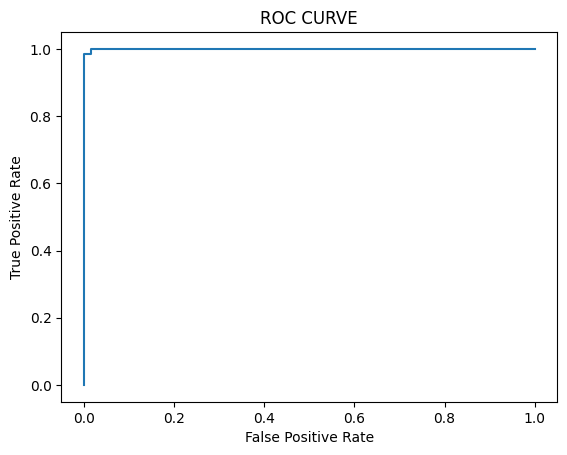

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()

In [21]:
roc_auc_score(y_test, y_probs)

0.999785515121184

C:\Users\Navya\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


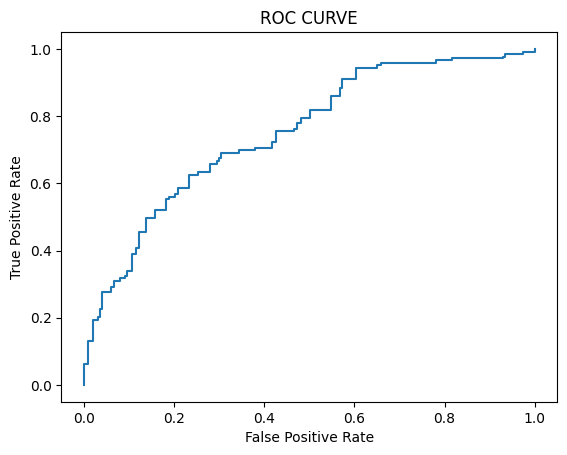

0.7505064226305379

In [22]:
y_probs = log.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()

roc_auc_score(y_test, y_probs)

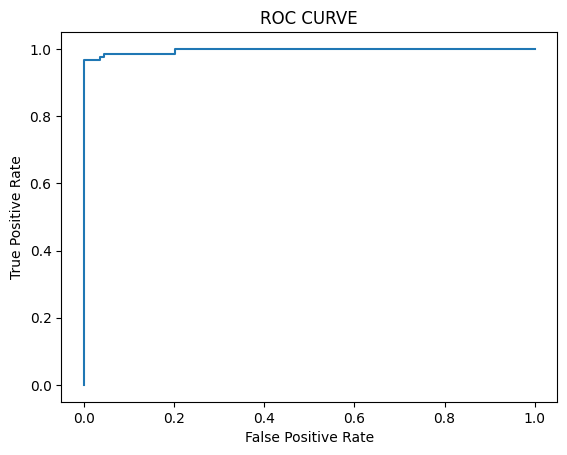

0.996377588713329

In [23]:
y_probs = gb_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()

roc_auc_score(y_test, y_probs)

C:\Users\Navya\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


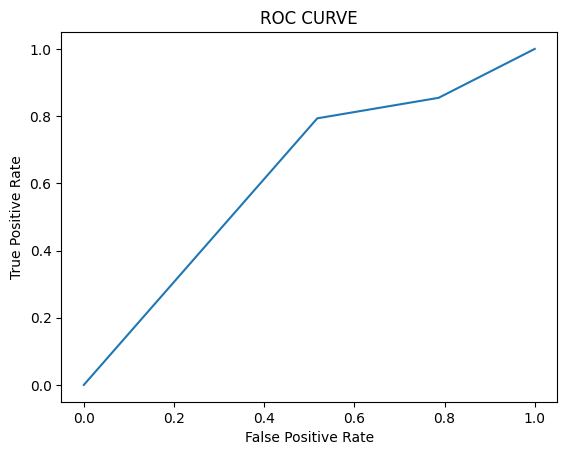

0.624758704511332

In [24]:
y_probs = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()

roc_auc_score(y_test, y_probs)

**hyperparameter Tuning**

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],
    'max_depth': [30],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']
}

forest = RandomForestClassifier(n_jobs=-1, random_state=9)
#three fold cross validation
#ie making 3 splits and using 2 of them for training and 1 for test alternately
grid_search= GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=2)

In [26]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


,estimator,RandomForestC...andom_state=9)
,param_grid,"{'max_depth': [30], 'max_features': ['sqrt'], 'min_samples_leaf': [2], 'min_samples_split': [5], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [27]:
best_forest = grid_search.best_estimator_
best_forest

,n_estimators,100
,criterion,'gini'
,max_depth,30
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**feature Importances**

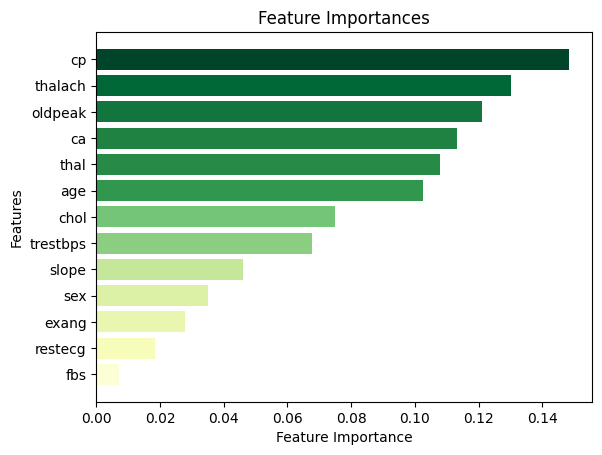

In [28]:
feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors= plt.cm.YlGn(sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances , color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

<Axes: >

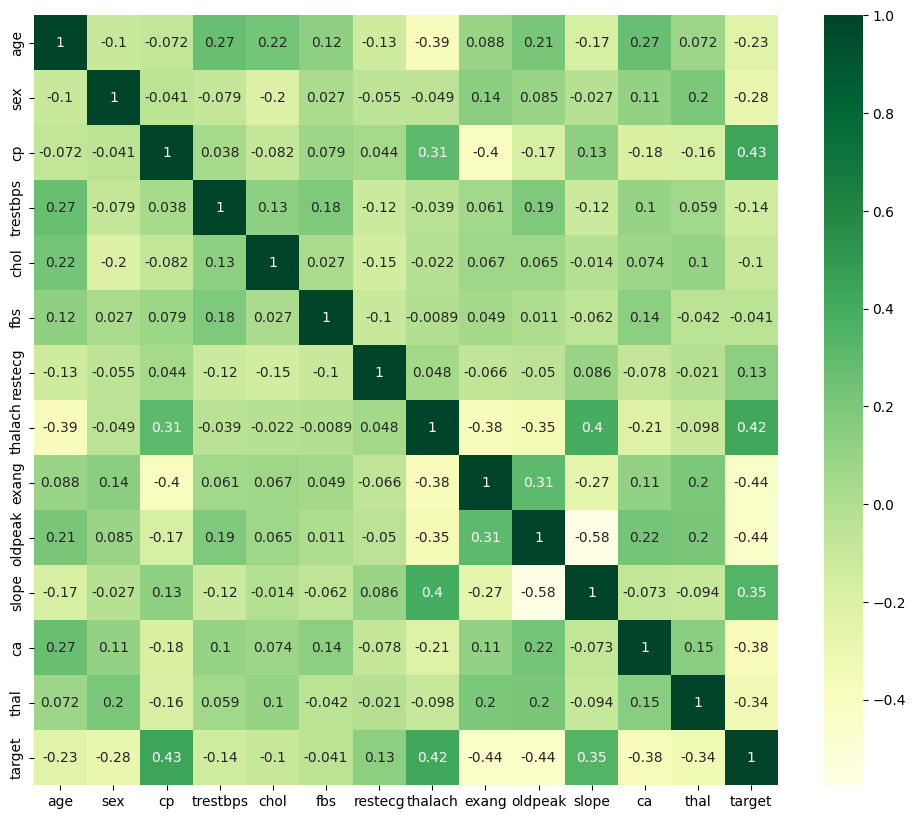

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGn')

<Axes: >

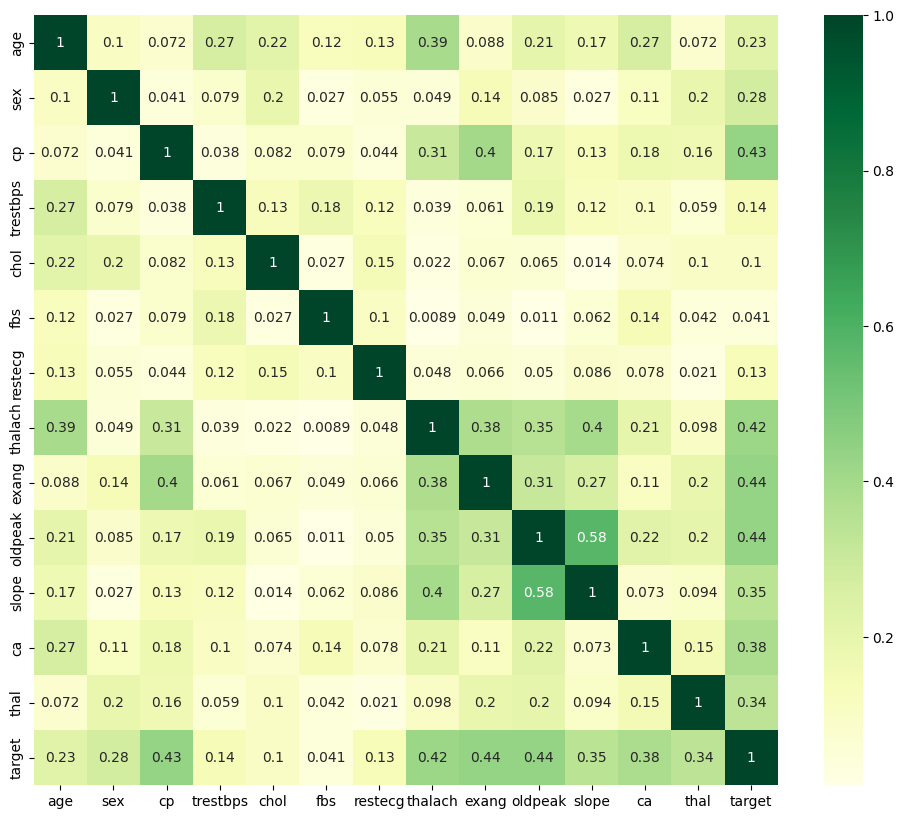

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGn')

In [38]:
important_features=['cp','thalach','ca','oldpeak']
df_imp= df[important_features]
df_imp

,cp,thalach,ca,oldpeak
0,0,168,2,1.0
1,0,155,0,3.1
2,0,125,0,2.6
3,0,161,1,0.0
4,0,106,3,1.9
...,...,...,...,...
1020,1,164,0,0.0
1021,0,141,1,2.8
1022,0,118,1,1.0
1023,0,159,0,0.0


<Axes: >

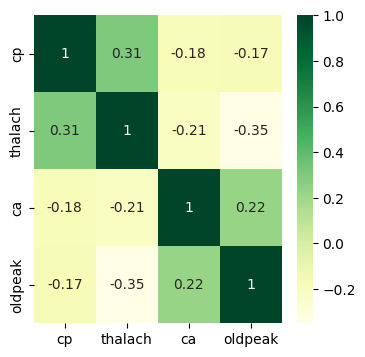

In [39]:
plt.figure(figsize=(4,4))
sns.heatmap(df_imp.corr(), annot=True, cmap='YlGn')

In [41]:
X_train_top4, X_test_top4, y_train_top4, y_test_top4 = train_test_split(df_imp, y, test_size=0.2, random_state=42)

# Scaling
scaler_top4 = StandardScaler()
X_train_top4_scaled = scaler_top4.fit_transform(X_train_top4)
X_test_top4_scaled = scaler_top4.transform(X_test_top4)


In [44]:
forest_top4 = RandomForestClassifier()
forest_top4.fit(X_train_top4_scaled, y_train_top4)

# Predict
y_pred_top4 = forest_top4.predict(X_test_top4_scaled)

# Evaluate
print("Random Forest - Top 4 Features Only")
print("Accuracy:", accuracy_score(y_test_top4, y_pred_top4))
print("Confusion Matrix:\n", confusion_matrix(y_test_top4, y_pred_top4))
print("Classification Report:\n", classification_report(y_test_top4, y_pred_top4))


Random Forest - Top 4 Features Only
Accuracy: 0.9804878048780488
Confusion Matrix:
 [[101   1]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



###Final Conclusion

We evaluated Random Forest in two ways:
- Using **all features** → Accuracy: 0.9853%
- Using **only top 4 features** → Accuracy: 98.04%

The model with top 4 features performs slightly worse but is still a simpler and interpretable choice for deployment.
